In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv('adult.data.csv',header=None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex',' capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_data.columns = col_labels
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Analysis

In [3]:
train_data.shape

(32561, 15)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10   capital_gain   32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
for column in train_data.columns :
    print(column )
    print(train_data[column].unique())
    print("----------------------------------------------------------")
    

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
----------------------------------------------------------
workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
----------------------------------------------------------
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
----------------------------------------------------------
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
----------------------------------------------------------
education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
----------------------------------------------------------
marital_status
[' Never-

At a first glance of our dataset, we can see that missing values are present in the form of "?" in "workclass","occupation", "native-country".

Nan values were as ? in data. Hence we fix this with most frequent element(mode) in the entire dataset. It generalizes well, as we will see with the accuracy of our classifiers

In [6]:
train_data.isin([' ?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
 capital_gain        0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [7]:
data_withspcl=train_data.copy()

In [8]:
attrib, counts = np.unique(train_data['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
train_data['workclass'] = train_data['workclass'].replace(' ?' ,most_freq_attrib)
attrib, counts = np.unique(train_data['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
train_data['occupation'] = train_data['occupation'].replace(' ?' ,most_freq_attrib)
attrib, counts = np.unique(train_data['native_country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
train_data['native_country'] = train_data['native_country'].replace(' ?' ,most_freq_attrib)

In [9]:
train_data.isin([' ?']).sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
 capital_gain     0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

## Convert wage_class into binary classification 

In [10]:
train_data['wage_class']=train_data['wage_class'].map({' <=50K' : 0 ,' >50K' : 1})


In [11]:
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### summary for numerical features

In [12]:
train_data=train_data.drop(columns='education_num')
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
wage_class,32561.0,0.240810,0.427581,0.0,0.0,0.0,0.0,1.0


In [13]:
train_data.describe(include=["O"]).T

,count,unique,top,freq
workclass,32561,8,Private,24532
education,32561,16,HS-grad,10501
marital_status,32561,7,Married-civ-spouse,14976
occupation,32561,14,Prof-specialty,5983
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native_country,32561,41,United-States,29753


## EDA

#### Age

<AxesSubplot:ylabel='Frequency'>

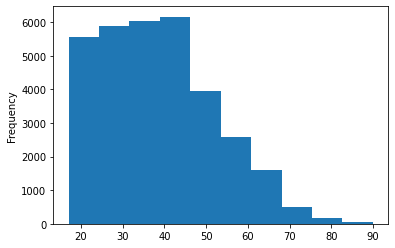

In [14]:
train_data['age'].plot.hist(bins=10)

In [15]:
train_data[train_data['age']>70].shape

(540, 14)

This dataset has fewer observations(540) of people's age after certain age i.e. 70 years.

#### fnlwgt
fnlwght variable may stand for a weight of an observation.

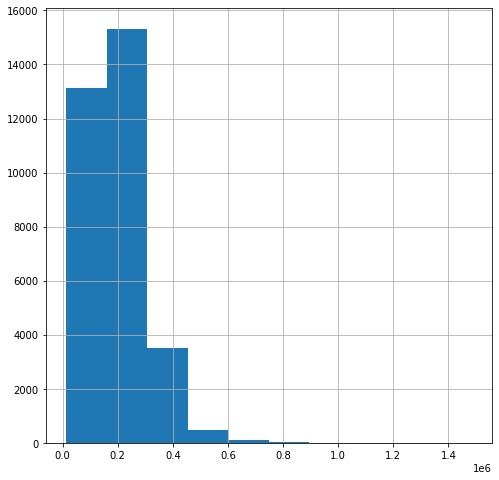

In [16]:
train_data['fnlwgt'].hist(figsize=(8,8))
plt.show()

#### capital_gain

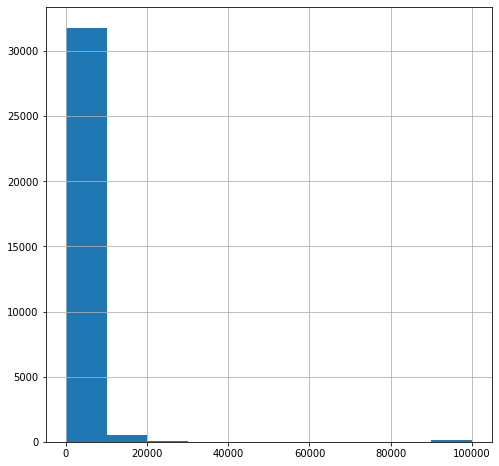

In [17]:
train_data[" capital_gain"].hist(figsize=(8,8))
plt.show()

#### capital_loss

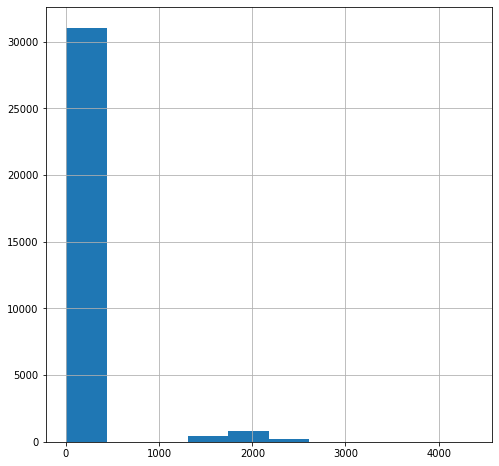

In [18]:
train_data['capital_loss'].hist(figsize=(8,8))
plt.show()

both capital_gain and capital_loss histograms shows that most of the values are centered on 0 .

#### hours_per_week

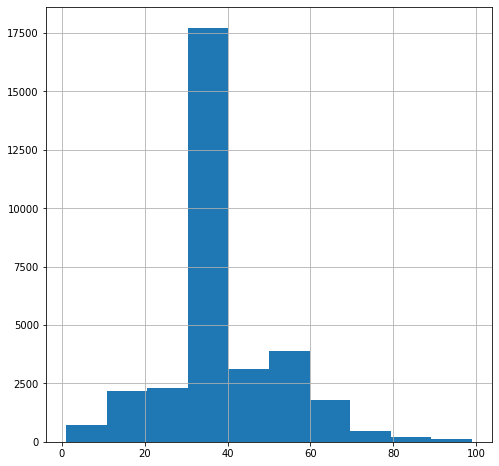

In [19]:
train_data['hours_per_week'].hist(figsize=(8,8))
plt.show()

Most people work 30-40 hours per week, they are roughly 17,600 people.

### Relation between capital gain and capital loss

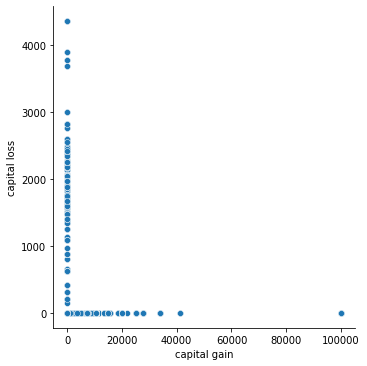

In [20]:
import seaborn as sns
sns.relplot(' capital_gain','capital_loss', data= train_data)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

Possibilities for capital gain and capital loss

Both capital gain and capital loss can be zero

If capital.gain is zero there is possibility of capital loss being high or above zero.

If capital loss is zero there is possibility of capital.gain being high or above zero.

## Distribution of categorical features

#### workclass

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


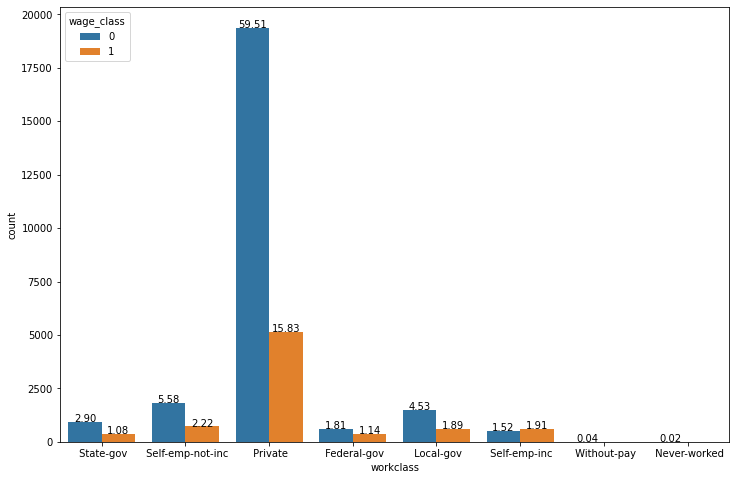

In [21]:
plt.figure(figsize=(12,8))

total = float(len(train_data["wage_class"]) )

ax = sns.countplot(x="workclass",hue="wage_class", data=train_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Summary distribution shows that:

There are 8 unique categories present in the worclass attribute.

Most of them belong to the private workclass i.e. 75.34%.

without-pay and never-worked has minimum count in workclass attribute(less than 1%).

There is huge imbalance in the categories of workclass attribute.

#### Education

posx and posy should be finite values
posx and posy should be finite values


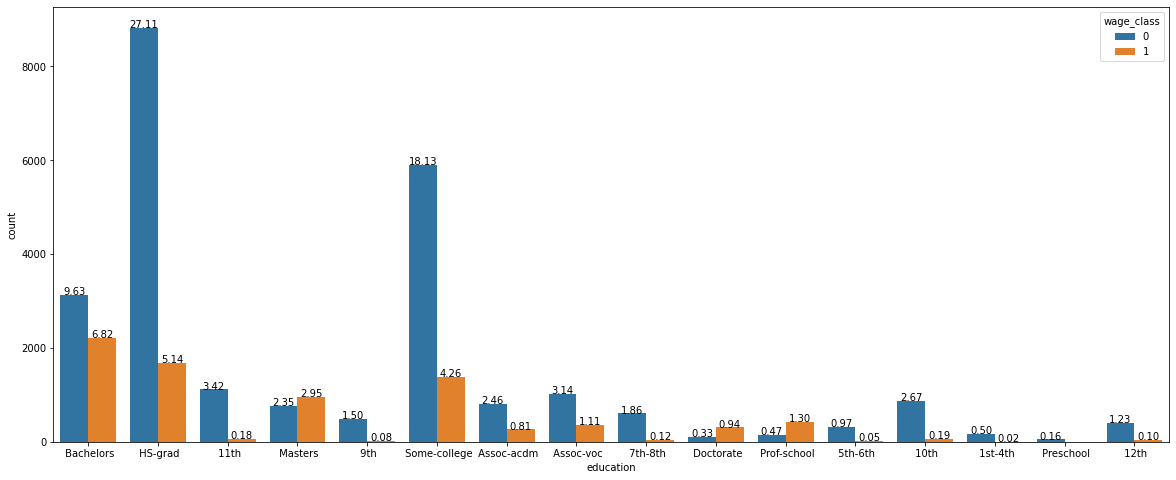

In [22]:
plt.figure(figsize=(20,8))

total = float(len(train_data["wage_class"]) )

ax = sns.countplot(x="education",hue="wage_class", data=train_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 16 unique categories present in the education attribute.

Hs-grad has 32.25% of all the education attribute.

Pre-school has minimum samples.

#### marital_status

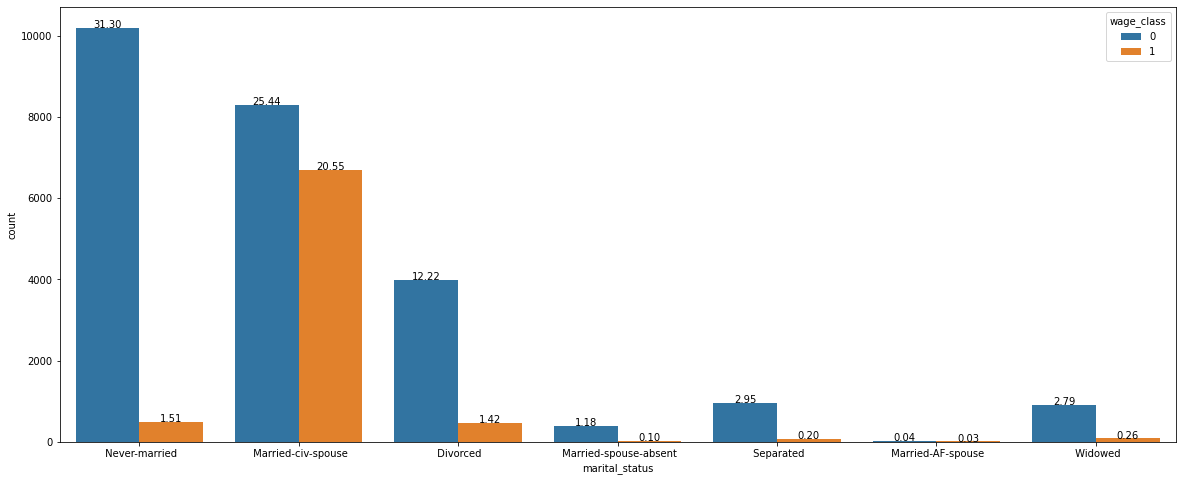

In [23]:
plt.figure(figsize=(20,8))

total = float(len(train_data["wage_class"]) )

ax = sns.countplot(x="marital_status",hue="wage_class", data=train_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This marital-status attribute has 7 unique categories.

Two of them are dominate over other categories(these are Never-married(32.81%) and married-civ-spouse(45.99%).
                                               
Married-civ-spouse has maximum number of samples.
                                               
Married-AF-spouse has minimum number of obs.


#### relationship

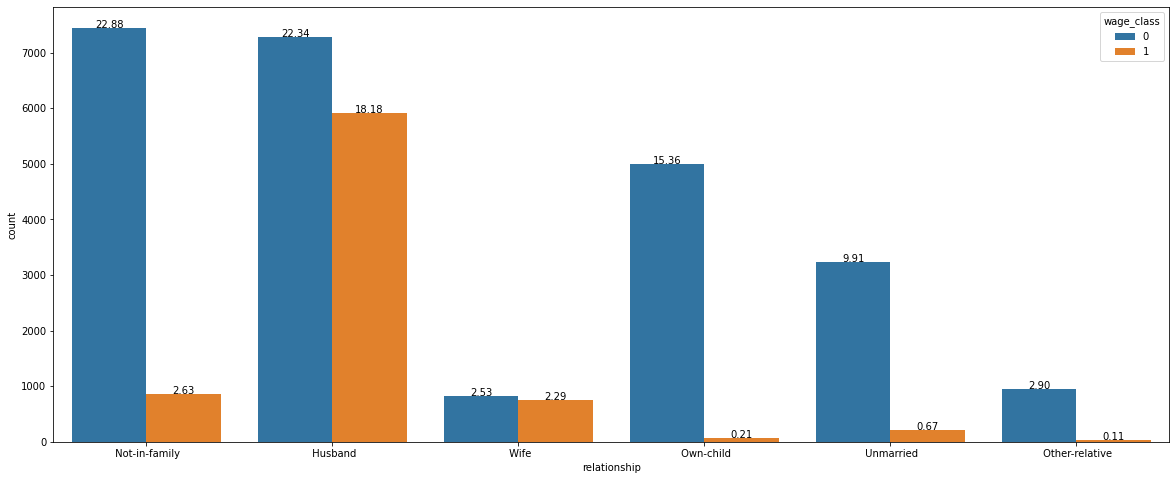

In [24]:
plt.figure(figsize=(20,8))

total = float(len(train_data["wage_class"]) )

ax = sns.countplot(x="relationship",hue="wage_class", data=train_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 6 unique categories in the relationship attribute.

Husband has maximum percentage (40.52%) among all categories followed by not-in-family(25.51%)


#### race

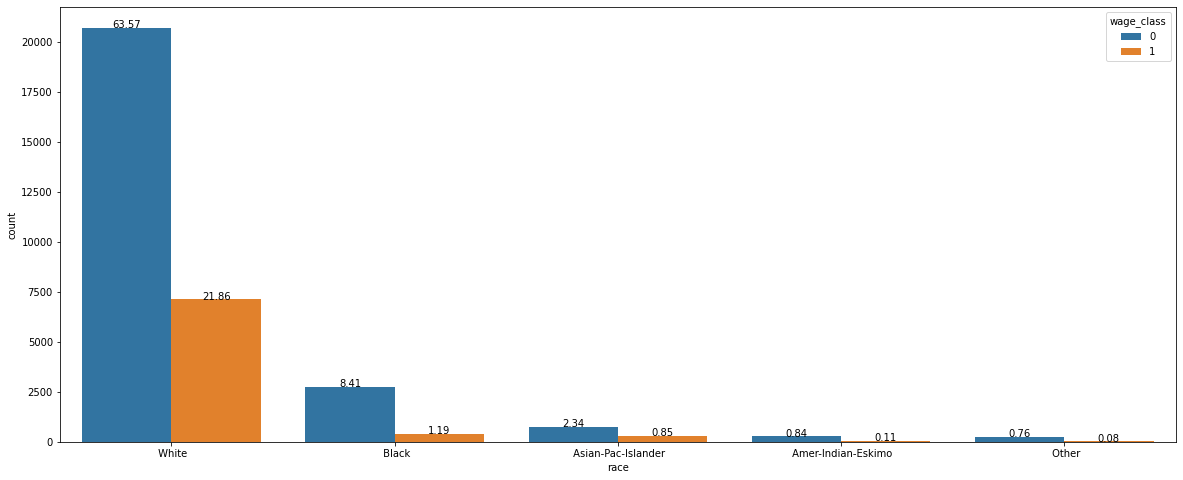

In [25]:
plt.figure(figsize=(20,8))

total = float(len(train_data["wage_class"]) )

ax = sns.countplot(x="race", hue="wage_class",data=train_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 5 unique categories in the race attribute.

Most of them are "white" which is roughly 85.43%.

This dataset is totally bias toward the "white" race.

Second major race in the dataset is the "black" with just 9.59%.

#### sex

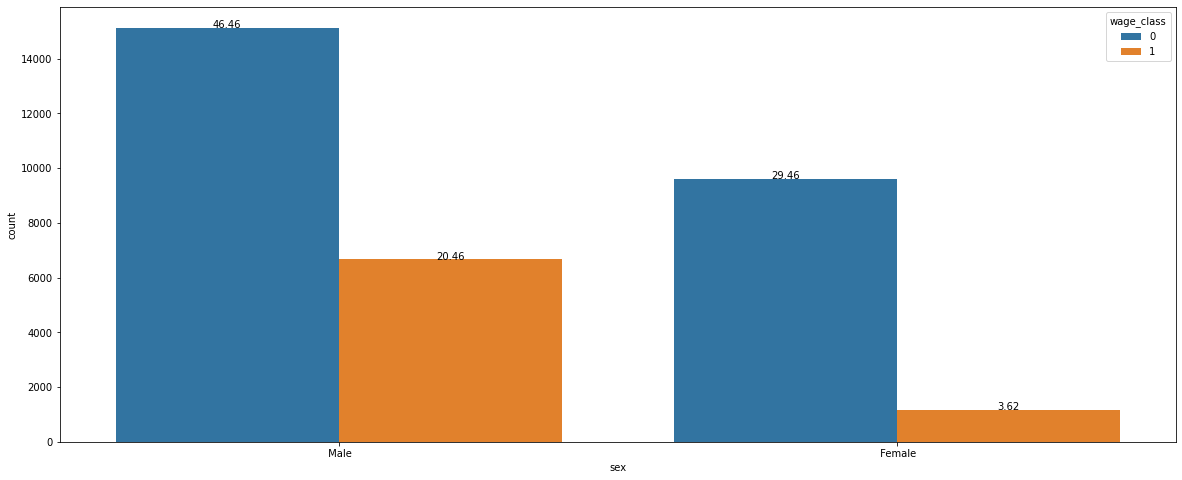

In [26]:
plt.figure(figsize=(20,8))

total = float(len(train_data["wage_class"]) )

ax = sns.countplot(x="sex",hue="wage_class", data=train_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Gender has 2 unique categories(male and female).

But the frequency of male is higher than the female categories.

Distribution shows that this dataset is skewed toward the male with nearly 66.92%.

#### native_country

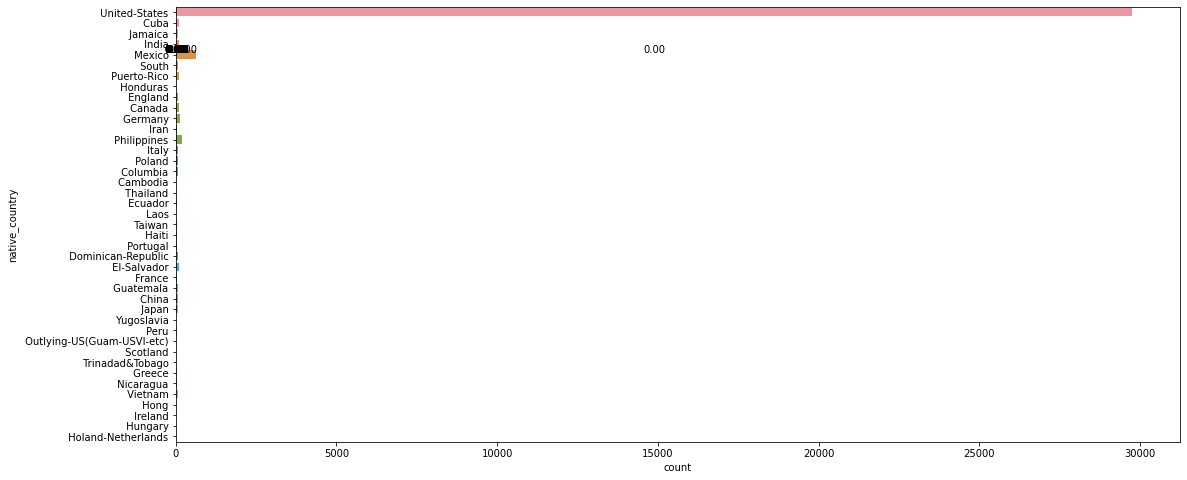

In [27]:
plt.figure(figsize=(18,8))

total = float(len(train_data["wage_class"]) )

ax = sns.countplot(y="native_country", data=train_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This dataset is taken from the US.

As 91.5% of them have native country America and others are immigrants.


#### occupation

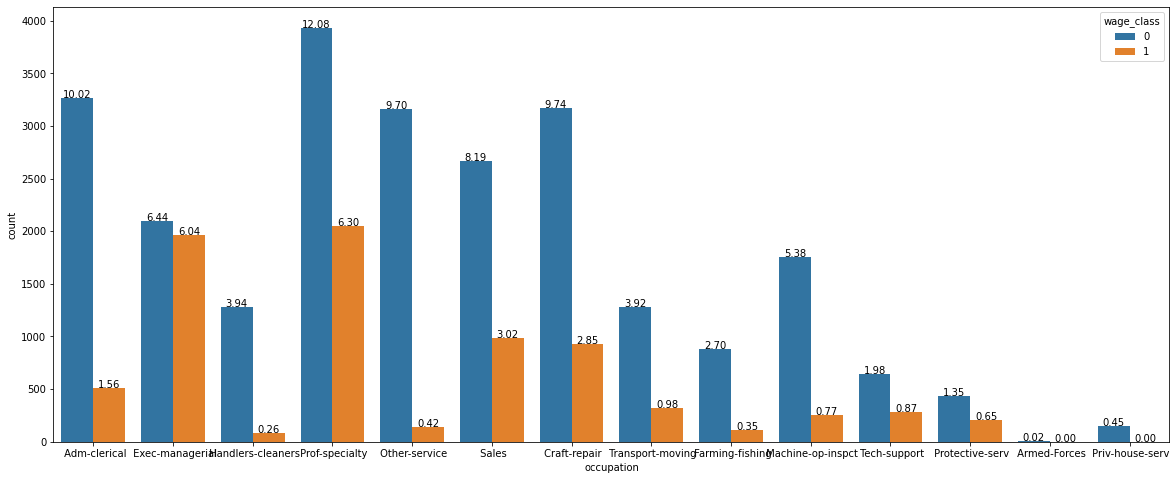

In [28]:
plt.figure(figsize=(20,8))

total = float(len(train_data["wage_class"]) )

ax = sns.countplot(x="occupation",hue="wage_class", data=train_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 14 unique categories present in the occupation attribute.

Prof-specialty has the maximum count but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.

Armed-Forces has minimum samples in the occupation attribute.

#### wage_class

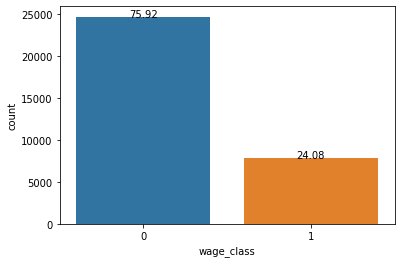

In [29]:
total = float(len(train_data) )

ax = sns.countplot(x="wage_class", data=train_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This dataset not balance , i.e. 24.08%of them are belong to income group 1 and 75.92% fall under the income group 0 .

## Bivariate Analysis

### Age and wage_class

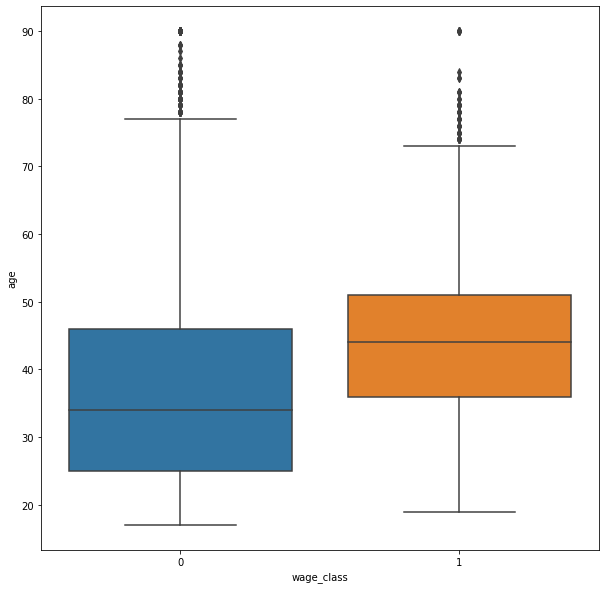

In [30]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="wage_class", y="age", data=train_data)
plt.show()

### wage_class and hours_per_week

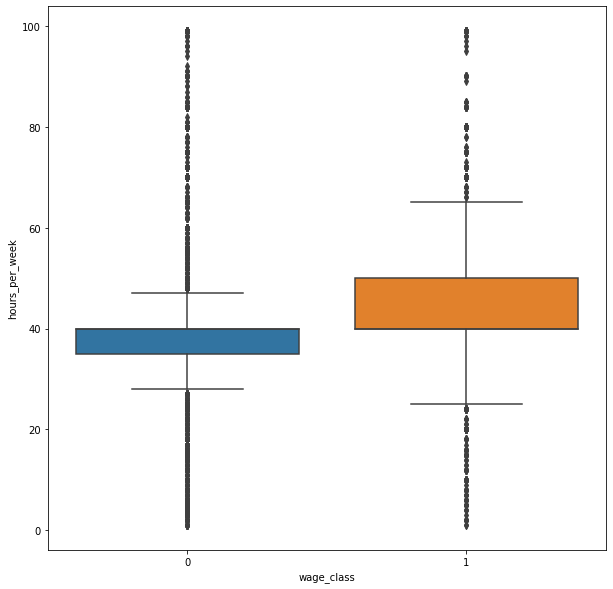

In [31]:
import seaborn as sns
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="wage_class", y="hours_per_week", data=train_data)
plt.show()

### Capital_gain and wage_class

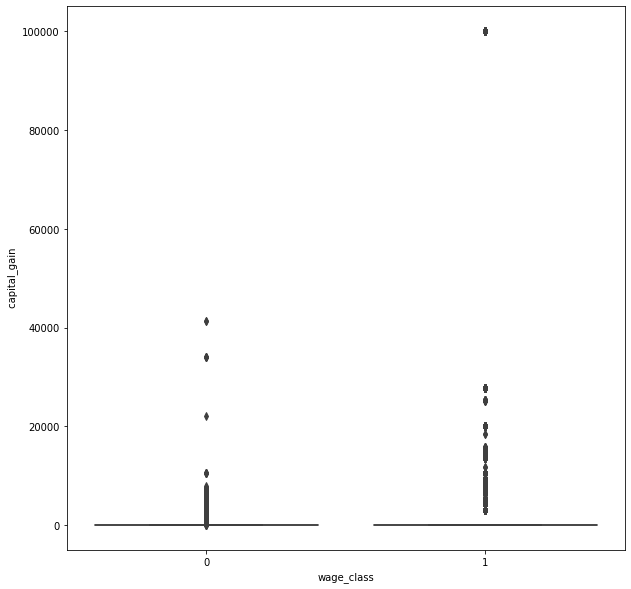

In [32]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="wage_class", y=" capital_gain", data=train_data)
plt.show()

### Capital_loss and wage_class

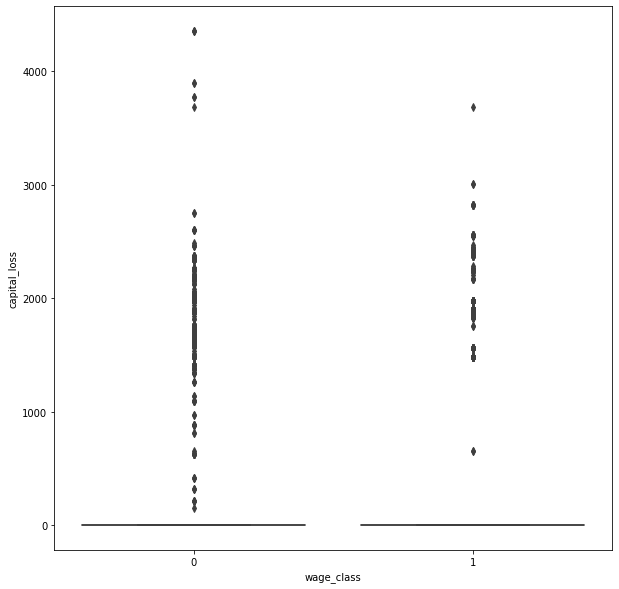

In [33]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="wage_class", y="capital_loss", data=train_data)
plt.show()

### wage_class and fnlwgt

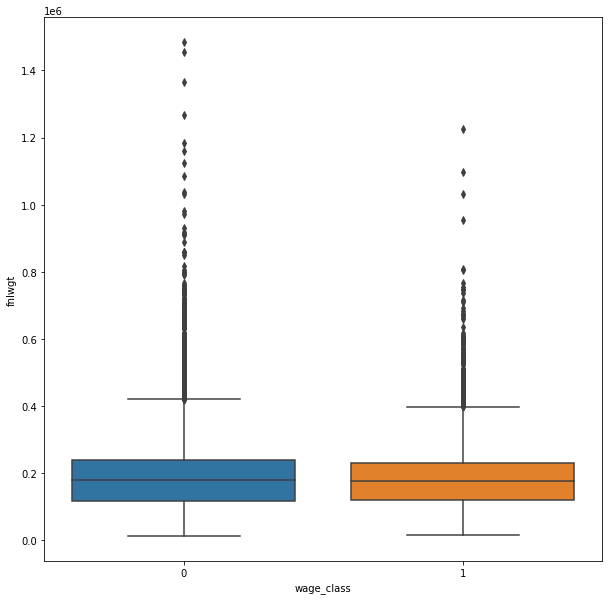

In [34]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="wage_class", y="fnlwgt", data=train_data)
plt.show()

<AxesSubplot:xlabel='count', ylabel='wage_class'>

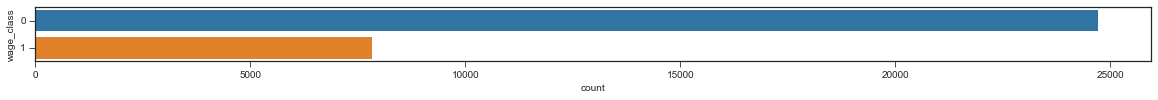

In [35]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="wage_class", data=train_data)

Income level less than 50K is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed

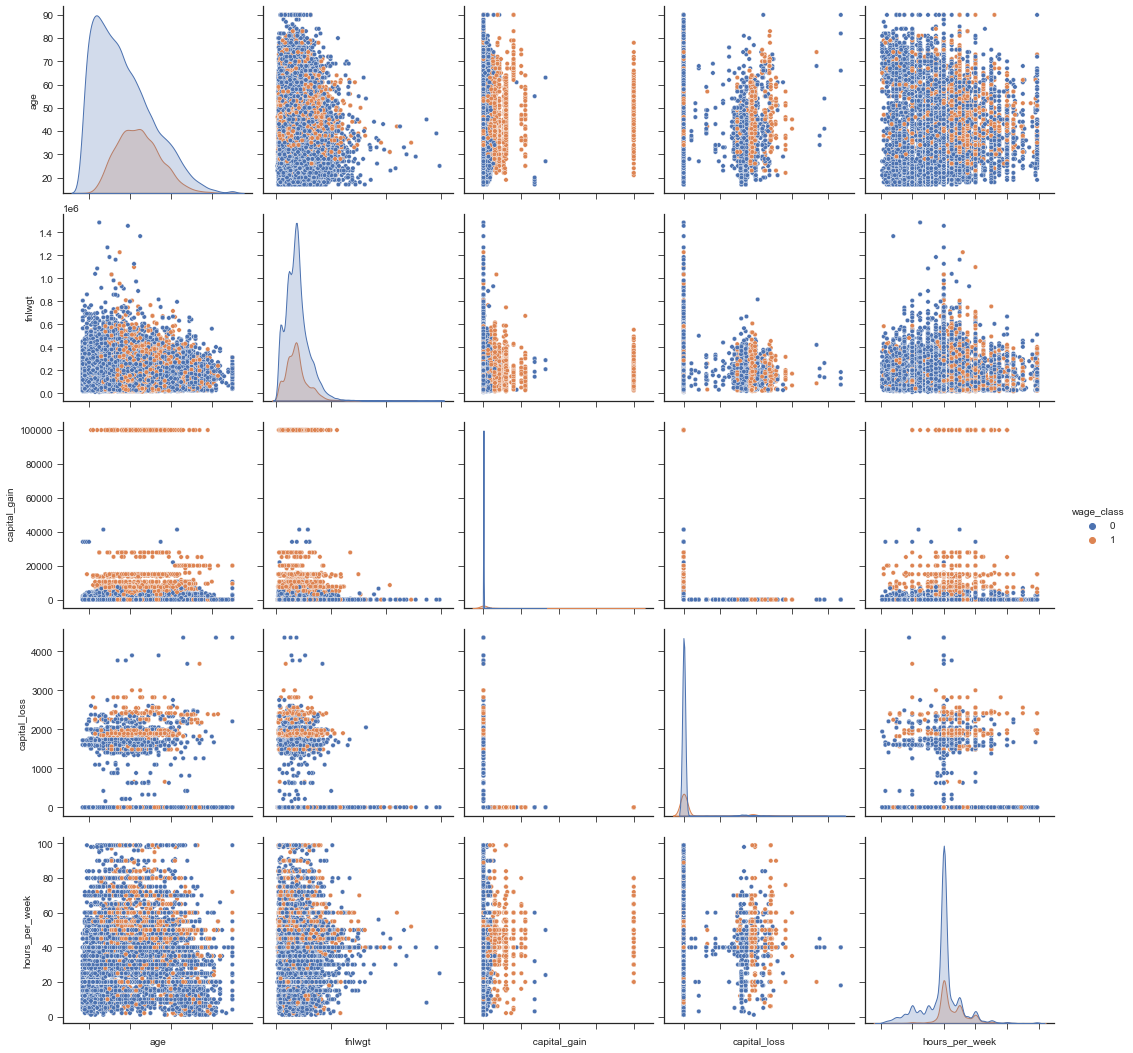

In [36]:
#pair plots of entire dataset
pp = sns.pairplot(train_data, hue = 'wage_class', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

In [37]:
train_data=train_data.drop(columns='native_country')

In [38]:
train_data

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0


In [39]:
from sklearn.preprocessing import LabelEncoder
encod=LabelEncoder()
train_data['sex']=encod.fit_transform(train_data['sex'])
train_data['race']=encod.fit_transform(train_data['race'])
train_data['relationship']=encod.fit_transform(train_data['relationship'])
train_data['occupation']=encod.fit_transform(train_data['occupation'])
train_data['marital_status']=encod.fit_transform(train_data['marital_status'])
train_data['education']=encod.fit_transform(train_data['education'])
train_data['workclass']=encod.fit_transform(train_data['workclass'])


In [40]:
train_data

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,6,77516,9,4,0,1,4,1,2174,0,40,0
1,50,5,83311,9,2,3,0,4,1,0,0,13,0
2,38,3,215646,11,0,5,1,4,1,0,0,40,0
3,53,3,234721,1,2,5,0,2,1,0,0,40,0
4,28,3,338409,9,2,9,5,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,2,12,5,4,0,0,0,38,0
32557,40,3,154374,11,2,6,0,4,1,0,0,40,1
32558,58,3,151910,11,6,0,4,4,0,0,0,40,0
32559,22,3,201490,11,4,0,3,4,1,0,0,20,0


In [41]:
X_train_=train_data.drop(columns='wage_class')
y_train=train_data['wage_class']

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_)

## Preparing the test data for evaluation

In [43]:
test_set=pd.read_csv("adult.test.csv",skiprows=1,header=None)
test_set.columns = col_labels

In [44]:
test_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [45]:
test_set.isin([' ?']).sum(axis=0)

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
 capital_gain       0
capital_loss        0
hours_per_week      0
native_country    274
wage_class          0
dtype: int64

In [46]:
attrib, counts = np.unique(test_set['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
test_set['workclass'] = test_set['workclass'].replace(' ?' ,most_freq_attrib)
attrib, counts = np.unique(test_set['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
test_set['occupation'] = test_set['occupation'].replace(' ?' ,most_freq_attrib)
attrib, counts = np.unique(test_set['native_country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
test_set['native_country'] = test_set['native_country'].replace(' ?' ,most_freq_attrib)

In [47]:
test_set.isin([' ?']).sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
 capital_gain     0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [48]:
test_set=test_set.drop(columns=['education_num','native_country'])

In [49]:
encod1=LabelEncoder()
test_set['sex']=encod1.fit_transform(test_set['sex'])
test_set['race']=encod1.fit_transform(test_set['race'])
test_set['relationship']=encod1.fit_transform(test_set['relationship'])
test_set['occupation']=encod1.fit_transform(test_set['occupation'])
test_set['marital_status']=encod1.fit_transform(test_set['marital_status'])
test_set['education']=encod1.fit_transform(test_set['education'])
test_set['workclass']=encod1.fit_transform(test_set['workclass'])
test_set['wage_class']=encod1.fit_transform(test_set['wage_class'])

In [50]:
test_set

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,25,3,226802,1,4,6,3,2,1,0,0,40,0
1,38,3,89814,11,2,4,0,4,1,0,0,50,0
2,28,1,336951,7,2,10,0,4,1,0,0,40,1
3,44,3,160323,15,2,6,0,2,1,7688,0,40,1
4,18,3,103497,15,4,9,3,4,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,3,215419,9,0,9,1,4,0,0,0,36,0
16277,64,3,321403,11,6,9,2,2,1,0,0,40,0
16278,38,3,374983,9,2,9,0,4,1,0,0,50,0
16279,44,3,83891,9,0,0,3,1,1,5455,0,40,0


In [51]:
X_test_=test_set.drop(columns='wage_class')
y_test=test_set['wage_class']

In [52]:
X_test=scaler.fit_transform(X_test_)

### Applying XGBclassifier

In [53]:
import xgboost as xgb
from xgboost import XGBClassifier
xg=XGBClassifier(random_state=1,use_label_encoder= False)

In [54]:
xg.fit(X_train,y_train)

[09:48:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [55]:
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
a=accuracy_score(y_train,xg.predict(X_train))
print("Accuracy for train data set is =",a)

Accuracy for train data set is = 0.9031049414944259


In [56]:
## Prediction for test data set
y_pred=xg.predict(X_test)

In [57]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [58]:
a=accuracy_score(y_test,y_pred)
print("Accuracy for test data set is =",a)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy for test data set is = 0.8617406793194521
[[11618   817]
 [ 1434  2412]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     12435
           1       0.75      0.63      0.68      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.78      0.80     16281
weighted avg       0.86      0.86      0.86     16281



In [59]:
from sklearn.metrics import roc_auc_score
print('Overall AUC before tuning :', roc_auc_score(y_test, xg.predict_proba(X_test)[:,1]))

Overall AUC before tuning : 0.9107105570913627


# Now to increae the accuracy of the model, we'll do hyperparameter tuning using grid search


In [60]:
from sklearn.model_selection import GridSearchCV
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [61]:
grid_search= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[09:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END . learning_rate=1, max_depth=3, n_estimators=10; total time=   0.2s
[09:49:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  

KeyboardInterrupt: 

In [63]:
xg1=XGBClassifier( learning_rate = 1, max_depth = 5, n_estimators = 50)

In [64]:
xg1.fit(X_train,y_train)

[09:50:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
print("Accuracy for training data after tuning =",accuracy_score(y_train,xg1.predict(X_train)))

Accuracy for training data after tuning = 0.9014158041829182


In [66]:
y_pred_=xg1.predict(X_test)

In [67]:
print("Accuracy for test data aftr tuning is ",accuracy_score(y_test,y_pred_))
print(confusion_matrix(y_test,y_pred_))
print(classification_report(y_test,y_pred_))
    

Accuracy for test data aftr tuning is  0.85418586081936
[[11490   945]
 [ 1429  2417]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     12435
           1       0.72      0.63      0.67      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.78      0.79     16281
weighted avg       0.85      0.85      0.85     16281



In [ ]:
from sklearn.metrics import roc_auc_score
print('Overall AUC after tuning:', roc_auc_score(y_test, xg1.predict_proba(X_test)[:,1]))

### Do hyper parameter tuning with some other parameters

In [68]:
clf=XGBClassifier(n_estimators=50,max_depth = 6,learning_rate=0.2,subsample=.9,colsample_bytree=0.85)

In [69]:
clf.fit(X_train,y_train)

[09:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
print("Accuracy for training data after tuning =",accuracy_score(y_train,clf.predict(X_train)))

Accuracy for training data after tuning = 0.8848929701176254


In [71]:
y_pred=clf.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
    

Accuracy is  0.8636447392666298
[[11700   735]
 [ 1485  2361]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     12435
           1       0.76      0.61      0.68      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.78      0.80     16281
weighted avg       0.86      0.86      0.86     16281



In [72]:
print('Overall AUC after tuning:', roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

Overall AUC after tuning: 0.9170422964888036


In [84]:
a = X_train_.columns.to_list()
b = clf.feature_importances_.tolist()
d={'Features' : a , 'Importance' : b}
feat=pd.DataFrame(d)


In [85]:
print("Features and Its importance")
feat.nlargest(11,'Importance')

Features and Its importance


,Features,Importance
6,relationship,0.290095
4,marital_status,0.194613
9,capital_gain,0.162424
3,education,0.090330
10,capital_loss,0.067714
0,age,0.047323
11,hours_per_week,0.037455
5,occupation,0.036900
8,sex,0.030242
1,workclass,0.017941


## Logistic Regression

In [87]:

from sklearn.linear_model import LogisticRegression
log_regressor=LogisticRegression(max_iter=1000)
log_regressor.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [98]:
## Prediction for test data set
y_pred=log_regressor.predict(X_test)
a=accuracy_score(y_test,y_pred)
print("Accuracy for test data set is =",a)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Overall AUC :', roc_auc_score(y_test, log_regressor.predict_proba(X_test)[:,1]))

Accuracy for test data set is = 0.8024077145138505
[[11877   558]
 [ 2659  1187]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88     12435
           1       0.68      0.31      0.42      3846

    accuracy                           0.80     16281
   macro avg       0.75      0.63      0.65     16281
weighted avg       0.78      0.80      0.77     16281

Overall AUC : 0.8127093020994665


## Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 7,
 min_samples_leaf= 1,
 min_samples_split= 4,
 splitter= 'best')
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=4)

In [99]:
## Prediction for test data set
y_pred=dec_tree.predict(X_test)
a=accuracy_score(y_test,y_pred)
print("Accuracy for test data set is =",a)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Overall AUC:', roc_auc_score(y_test, dec_tree.predict_proba(X_test)[:,1]))

Accuracy for test data set is = 0.8500092131932928
[[11834   601]
 [ 1841  2005]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12435
           1       0.77      0.52      0.62      3846

    accuracy                           0.85     16281
   macro avg       0.82      0.74      0.76     16281
weighted avg       0.84      0.85      0.84     16281

Overall AUC: 0.8893991658339434


## Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
ran_reg=RandomForestClassifier()
ran_reg.fit(X_train,y_train)

RandomForestClassifier()

In [100]:
## Prediction for test data set
y_pred=ran_reg.predict(X_test)
a=accuracy_score(y_test,y_pred)
print("Accuracy for test data set is =",a)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Overall AUC:', roc_auc_score(y_test, ran_reg.predict_proba(X_test)[:,1]))

Accuracy for test data set is = 0.85148332412014
[[11577   858]
 [ 1560  2286]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.59      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.76      0.78     16281
weighted avg       0.84      0.85      0.85     16281

Overall AUC: 0.9010100363805464


In [101]:
print("Comparison")
data={'Algorithm' :['XgBoost','Logistic','Decision Tree','Random Forest'], 'ROC_AUC Score' :[0.9170422964888036,0.8127093020994665,0.8893991658339434,0.9010100363805464]}
pd.DataFrame(data)

Comparison


,Algorithm,ROC_AUC Score
0,XgBoost,0.917042
1,Logistic,0.812709
2,Decision Tree,0.889399
3,Random Forest,0.901010


We can see that XGboost gives best score for our dataset